In [1]:
from tqdm.auto import tqdm
import time
import json
import re
import numpy as np
from datasets import load_dataset

In [2]:
scored = load_dataset("IlyaGusev/saiga_scored")

Generating train split:   0%|          | 0/19633 [00:00<?, ? examples/s]

In [9]:
print(scored)

DatasetDict({
    train: Dataset({
        features: ['messages', 'source', 'opus_score', 'language', 'turns', 'sonnet_topic', 'sonnet_topic_explanation', 'sonnet_complexity', 'sonnet_complexity_explanation'],
        num_rows: 19633
    })
})


In [6]:
new_texts = []
for i, row in tqdm(enumerate(scored['train'])):
    context = to_conversation(row['messages'])
    new_texts.append({
        'index': i,
        'text': context
    })

0it [00:00, ?it/s]

In [43]:
def find_indexes(texts, numbered_texts):
    indexes = []
    for text1 in texts:
        for text2 in numbered_texts:
            if text1['context'] == text2['text']:
                indexes.append(text2['index'])
                break  # После нахождения соответствия можно прервать внутренний цикл
    return indexes

In [44]:
idx = find_indexes(data_texts, new_texts)

In [45]:
print(len(idx))

8015


In [57]:
data_new = []
for i, row in enumerate(tqdm(scored['train'])):
    data_new.append({
        'index': i,
        'text': to_conversation(row['messages']),
        'language': row['language'],
        'source': row['source'],
        'turns': row['turns'],
        'topic': row['sonnet_topic'],
        'complexity': row['sonnet_complexity']
    })

  0%|          | 0/19633 [00:00<?, ?it/s]

In [58]:
from collections import defaultdict

sources_data = {
    'gpt4': {'examples_count': 0, 'topics': set(), 'complexities': defaultdict(int)},
    'oasst': {'examples_count': 0, 'topics': set(), 'complexities': defaultdict(int)},
    'roleplay': {'examples_count': 0, 'topics': set(), 'complexities': defaultdict(int)},
    'saiga': {'examples_count': 0, 'topics': set(), 'complexities': defaultdict(int)},
    'tagengo': {'examples_count': 0, 'topics': set(), 'complexities': defaultdict(int)},
    'wildchat': {'examples_count': 0, 'topics': set(), 'complexities': defaultdict(int)},
    'gpt4_conversations_multilingual':{'examples_count': 0, 'topics': set(), 'complexities': defaultdict(int)}
}

for example in data_new:
    source = example['source']
    sources_data[source]['examples_count'] += 1
    sources_data[source]['topics'].add(example['topic'])
    sources_data[source]['complexities'][example['complexity']] += 1

# Выводим данные для каждого источника
for source, data in sources_data.items():
    print(f"Источник: {source}")
    print(f"Количество примеров: {data['examples_count']}")
    print(f"Количество различных топиков: {len(data['topics'])}")
    print("Различные топики:", ", ".join(data['topics']))
    print(data['complexities'])
    print()


Источник: gpt4
Количество примеров: 5293
Количество различных топиков: 23
Различные топики: languages, translation, travel, health, roleplay, other, writing, humanities, cooking, law, ecology, entertainment, stem, math, extract, finance, brainstorm, facts, career, reasoning, chit_chat, psychology, coding
defaultdict(<class 'int'>, {'medium': 3698, 'easy': 1179, 'hard': 416})

Источник: oasst
Количество примеров: 1175
Количество различных топиков: 24
Различные топики: languages, translation, travel, health, inappropriate, roleplay, other, writing, humanities, cooking, law, ecology, entertainment, stem, math, extract, finance, brainstorm, facts, career, reasoning, chit_chat, psychology, coding
defaultdict(<class 'int'>, {'medium': 752, 'easy': 244, 'hard': 179})

Источник: roleplay
Количество примеров: 215
Количество различных топиков: 17
Различные топики: ecology, languages, entertainment, health, travel, brainstorm, facts, roleplay, other, career, stem, humanities, writing, cooking, re

In [49]:
with open('textsIndexed.json', 'w', encoding='utf-8') as f:
    json.dump(data_new, f, indent=4, ensure_ascii=False)

In [5]:
def to_conversation(r):
    return "\n\n".join([f'{m["role"]}: {m["content"]}' for m in r])

In [3]:
!git clone 'https://github.com/Nejimaki-Tori/Models-evaluation'

Cloning into 'Models-evaluation'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 5.39 MiB | 2.28 MiB/s, done.


In [4]:
file_path = '/kaggle/working/Models-evaluation/textsNewRussian.json'

with open(file_path, 'r') as f:
    data_texts = json.load(f)

In [3]:
file_path = '/kaggle/working/Models-evaluation/scoresFinalRussian.json'

with open(file_path, 'r') as f:
    data_llama = json.load(f)

In [4]:
file_path = '/kaggle/working/Models-evaluation/scores_open_chat.json'

with open(file_path, 'r') as f:
    data_open = json.load(f)

In [5]:
file_path = '/kaggle/working/Models-evaluation/scores_c4.json'

with open(file_path, 'r') as f:
    data_c4 = json.load(f)

In [8]:
pairs_llama = [(item['index'], item['original_score'], item['computed_score']) for i, item in enumerate(data_llama)]
diff_llama = [abs(original_score - computed_score) for i, original_score, computed_score in pairs_llama]
pairs_open = [(item['index'], item['original_score'], item['computed_score']) for i, item in enumerate(data_open)]
diff_open = [abs(original_score - computed_score) for i, original_score, computed_score in pairs_open]
pairs_c4 = [(item['index'], item['original_score'], item['computed_score']) for i, item in enumerate(data_c4)]
diff_c4 = [abs(original_score - computed_score) for i, original_score, computed_score in pairs_c4]
scores = (pairs_llama, pairs_open, pairs_c4)

Корреляция между оценками: 0.40871193788685123
Средняя разница оценок: 0.8708312593330015
Число выбросов: 321
Средние оценки по примерам: [8.39323046 8.91090095]
Стандартное отклонение оценок по примерам: [1.53705645 1.15316589]


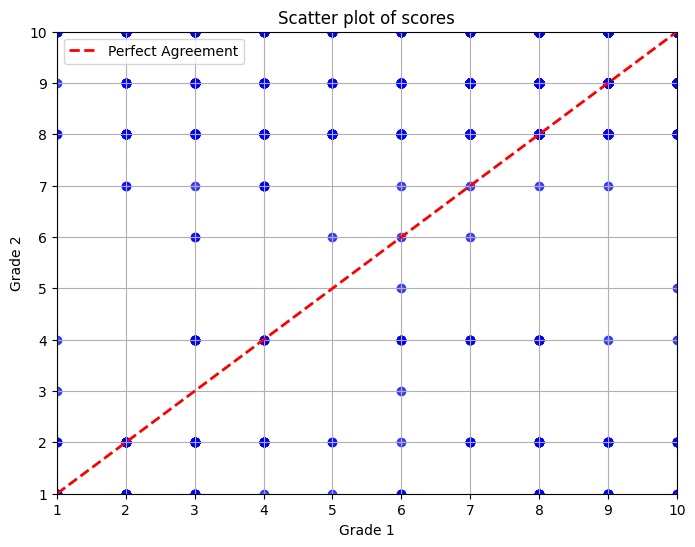

Корреляция между оценками: 0.4374858606325503
Средняя разница оценок: 0.8458188153310104
Число выбросов: 223
Средние оценки по примерам: [8.39323046 8.5979343 ]
Стандартное отклонение оценок по примерам: [1.53705645 1.22758275]


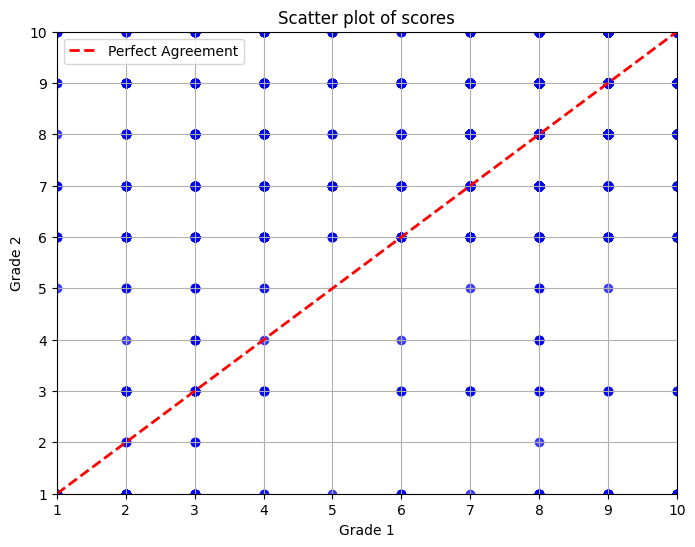

Корреляция между оценками: 0.31081941582166356
Средняя разница оценок: 1.079641612742658
Число выбросов: 181
Средние оценки по примерам: [8.39323046 7.97411648]
Стандартное отклонение оценок по примерам: [1.53705645 1.04886913]


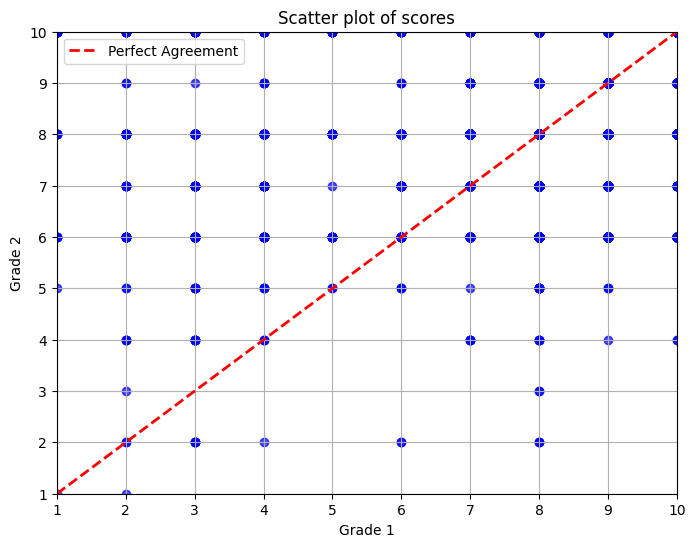

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def analyze_scores(scores):
    scores_array = np.array(scores)
    grades1 = scores_array[:, 1].astype(int)
    grades2 = scores_array[:, 2].astype(int)
    correlation = pearsonr(grades1, grades2)[0]
    mean_difference = np.mean(np.abs(grades1 - grades2))
    mean_grades = np.mean(scores_array[:, 1:], axis=0)
    std_grades = np.std(scores_array[:, 1:], axis=0)
    outliers = np.sum(np.abs(grades1 - grades2) > 3 * np.std(grades1 - grades2))

    return correlation, mean_difference, outliers, mean_grades, std_grades

def plot_scores(scores):
    scores_array = np.array(scores)
    grades1 = scores_array[:, 1].astype(int)
    grades2 = scores_array[:, 2].astype(int)
    mean_difference = np.mean(np.abs(grades1 - grades2))
    
    plt.figure(figsize=(8, 6))
    plt.scatter(grades1, grades2, color='blue', alpha=0.7)
    plt.plot([1, 10], [1, 10], color='red', linestyle='--', linewidth=2, label='Perfect Agreement')
    plt.title('Scatter plot of scores')
    plt.xlabel('Grade 1')
    plt.ylabel('Grade 2')
    plt.xlim(1, 10)
    plt.ylim(1, 10)
    plt.grid(True)
    plt.legend()
    plt.show()

for score in scores:
    # Вызываем функцию для анализа оценок
    correlation, mean_difference, outliers, mean_grades, std_grades = analyze_scores(score)

    # Выводим результаты
    print("Корреляция между оценками:", correlation)
    print("Средняя разница оценок:", mean_difference)
    print("Число выбросов:", outliers)
    print("Средние оценки по примерам:", mean_grades)
    print("Стандартное отклонение оценок по примерам:", std_grades)
    plot_scores(score)
